In [1]:
from __future__ import print_function, division
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Central and Satellite IA Models

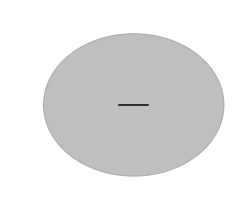

In [30]:
from matplotlib.patches import Circle, Ellipse
from matplotlib.collections import PatchCollection

patches = []
halo = Ellipse((0.0,0.0),1.9, 1.5, color='grey', alpha=0.5)

fig, ax = plt.subplots(figsize=(3.3,3.3))
fig.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9)
ax.add_artist(halo)
ax.set_xlim([-1,1])
ax.set_ylim([-1,1])
ax.axis('off')

ax.plot([-0.15,0.15],[0.0,0.0], color='black')

plt.show()

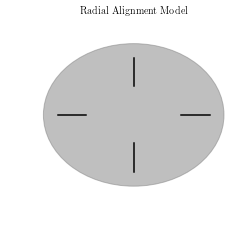

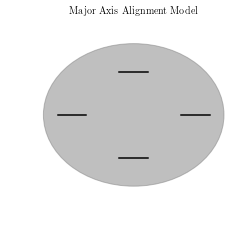

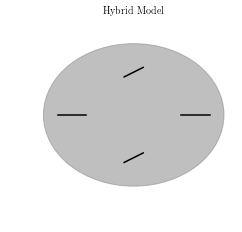

In [38]:
from matplotlib.patches import Circle, Ellipse
from matplotlib.collections import PatchCollection

halo = Ellipse((0.0,0.0),1.9, 1.5, color='grey', alpha=0.5)

fig, ax = plt.subplots(figsize=(3.3,3.3))
fig.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9)
ax.add_artist(halo)
ax.set_xlim([-1,1])
ax.set_ylim([-1,1])
ax.axis('off')

ax.plot([0,0],[0.6,0.3], color='black')
ax.plot([0,0],[-0.6,-0.3], color='black')
ax.plot([0.8,0.5],[0,0], color='black')
ax.plot([-0.8,-0.5],[0,0], color='black')

ax.set_title('Radial Alignment Model')

plt.show()


halo = Ellipse((0.0,0.0),1.9, 1.5, color='grey', alpha=0.5)

fig, ax = plt.subplots(figsize=(3.3,3.3))
fig.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9)
ax.add_artist(halo)
ax.set_xlim([-1,1])
ax.set_ylim([-1,1])
ax.axis('off')

ax.plot([-0.15,0.15],[0.45,0.45], color='black')
ax.plot([-0.15,0.15],[-0.45,-0.45], color='black')
ax.plot([0.8,0.5],[0,0], color='black')
ax.plot([-0.8,-0.5],[0,0], color='black')

ax.set_title('Major Axis Alignment Model')

plt.show()


halo = Ellipse((0.0,0.0),1.9, 1.5, color='grey', alpha=0.5)

fig, ax = plt.subplots(figsize=(3.3,3.3))
fig.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9)
ax.add_artist(halo)
ax.set_xlim([-1,1])
ax.set_ylim([-1,1])
ax.axis('off')

ax.plot([-0.1,0.1],[0.4,0.5], color='black')
ax.plot([-0.1,0.1],[-0.5,-0.4], color='black')
ax.plot([0.8,0.5],[0,0], color='black')
ax.plot([-0.8,-0.5],[0,0], color='black')

ax.set_title('Hybrid Model')

plt.show()